In [1]:
# some basic python imports 
import msmexplorer as msme
import numpy as np
%pylab inline
import seaborn as sns 
sns.set_style("whitegrid")
sns.color_palette("colorblind")
sns.set_context("poster",1.3)
import mdtraj as md
from msmbuilder.utils import load,dump

Populating the interactive namespace from numpy and matplotlib


/Users/muneeb/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/muneeb/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
plot_feat = load("./train_data/raw_features.pkl")
train_feat = load("./train_data/features.pkl")

In [3]:
df = load("./train_data/feature_descriptor.pkl")

In [4]:
nrm_features = train_feat



In [5]:
from sklearn.linear_model import LogisticRegression
import os


In [6]:
X=np.vstack(plot_feat)
full_X=np.vstack(train_feat)

full_Y=np.concatenate([np.zeros(len(plot_feat[0])),
            np.ones(len(plot_feat[0]))])
if not os.path.isfile("./lr_model_2.pkl"):
    train =True 
else:
    clf = load("./lr_model_2.pkl")
    train =False


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [8]:
X_train, X_test, y_train, y_test = train_test_split(full_X,full_Y,test_size=0.2, random_state=123)

In [9]:
svc = LogisticRegression(penalty="l1")
C_s = np.logspace(-10, 2, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, full_X, full_Y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

In [10]:
gold_clf_acc = np.sum(clf.predict(X_test)==y_test)/len(y_test)

In [29]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

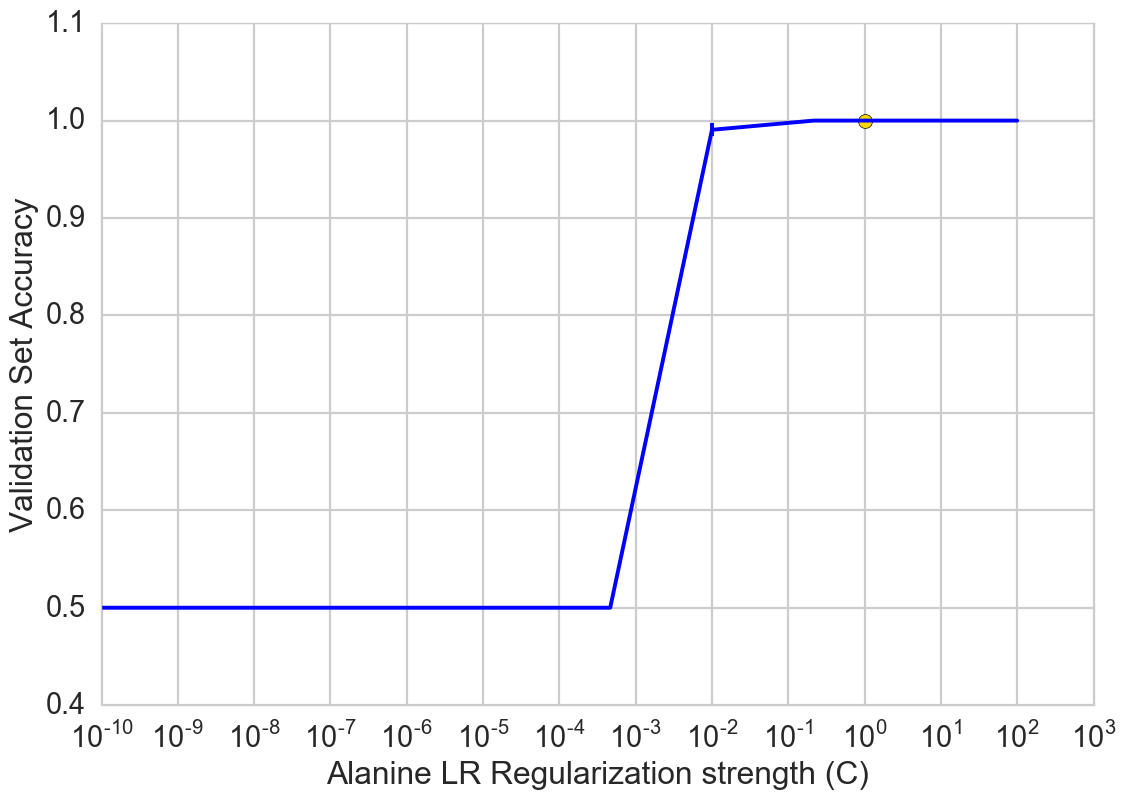

In [24]:
errorbar(C_s,scores,yerr=scores_std)
semilogx()
scatter(clf.C,gold_clf_acc,s=100,c='gold')
xlabel("Alanine LR Regularization strength (C)")
ylabel("Validation Set Accuracy")

In [12]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

([<matplotlib.axis.XTick at 0x1044f9860>,
 <a list of 4 Text xticklabel objects>)

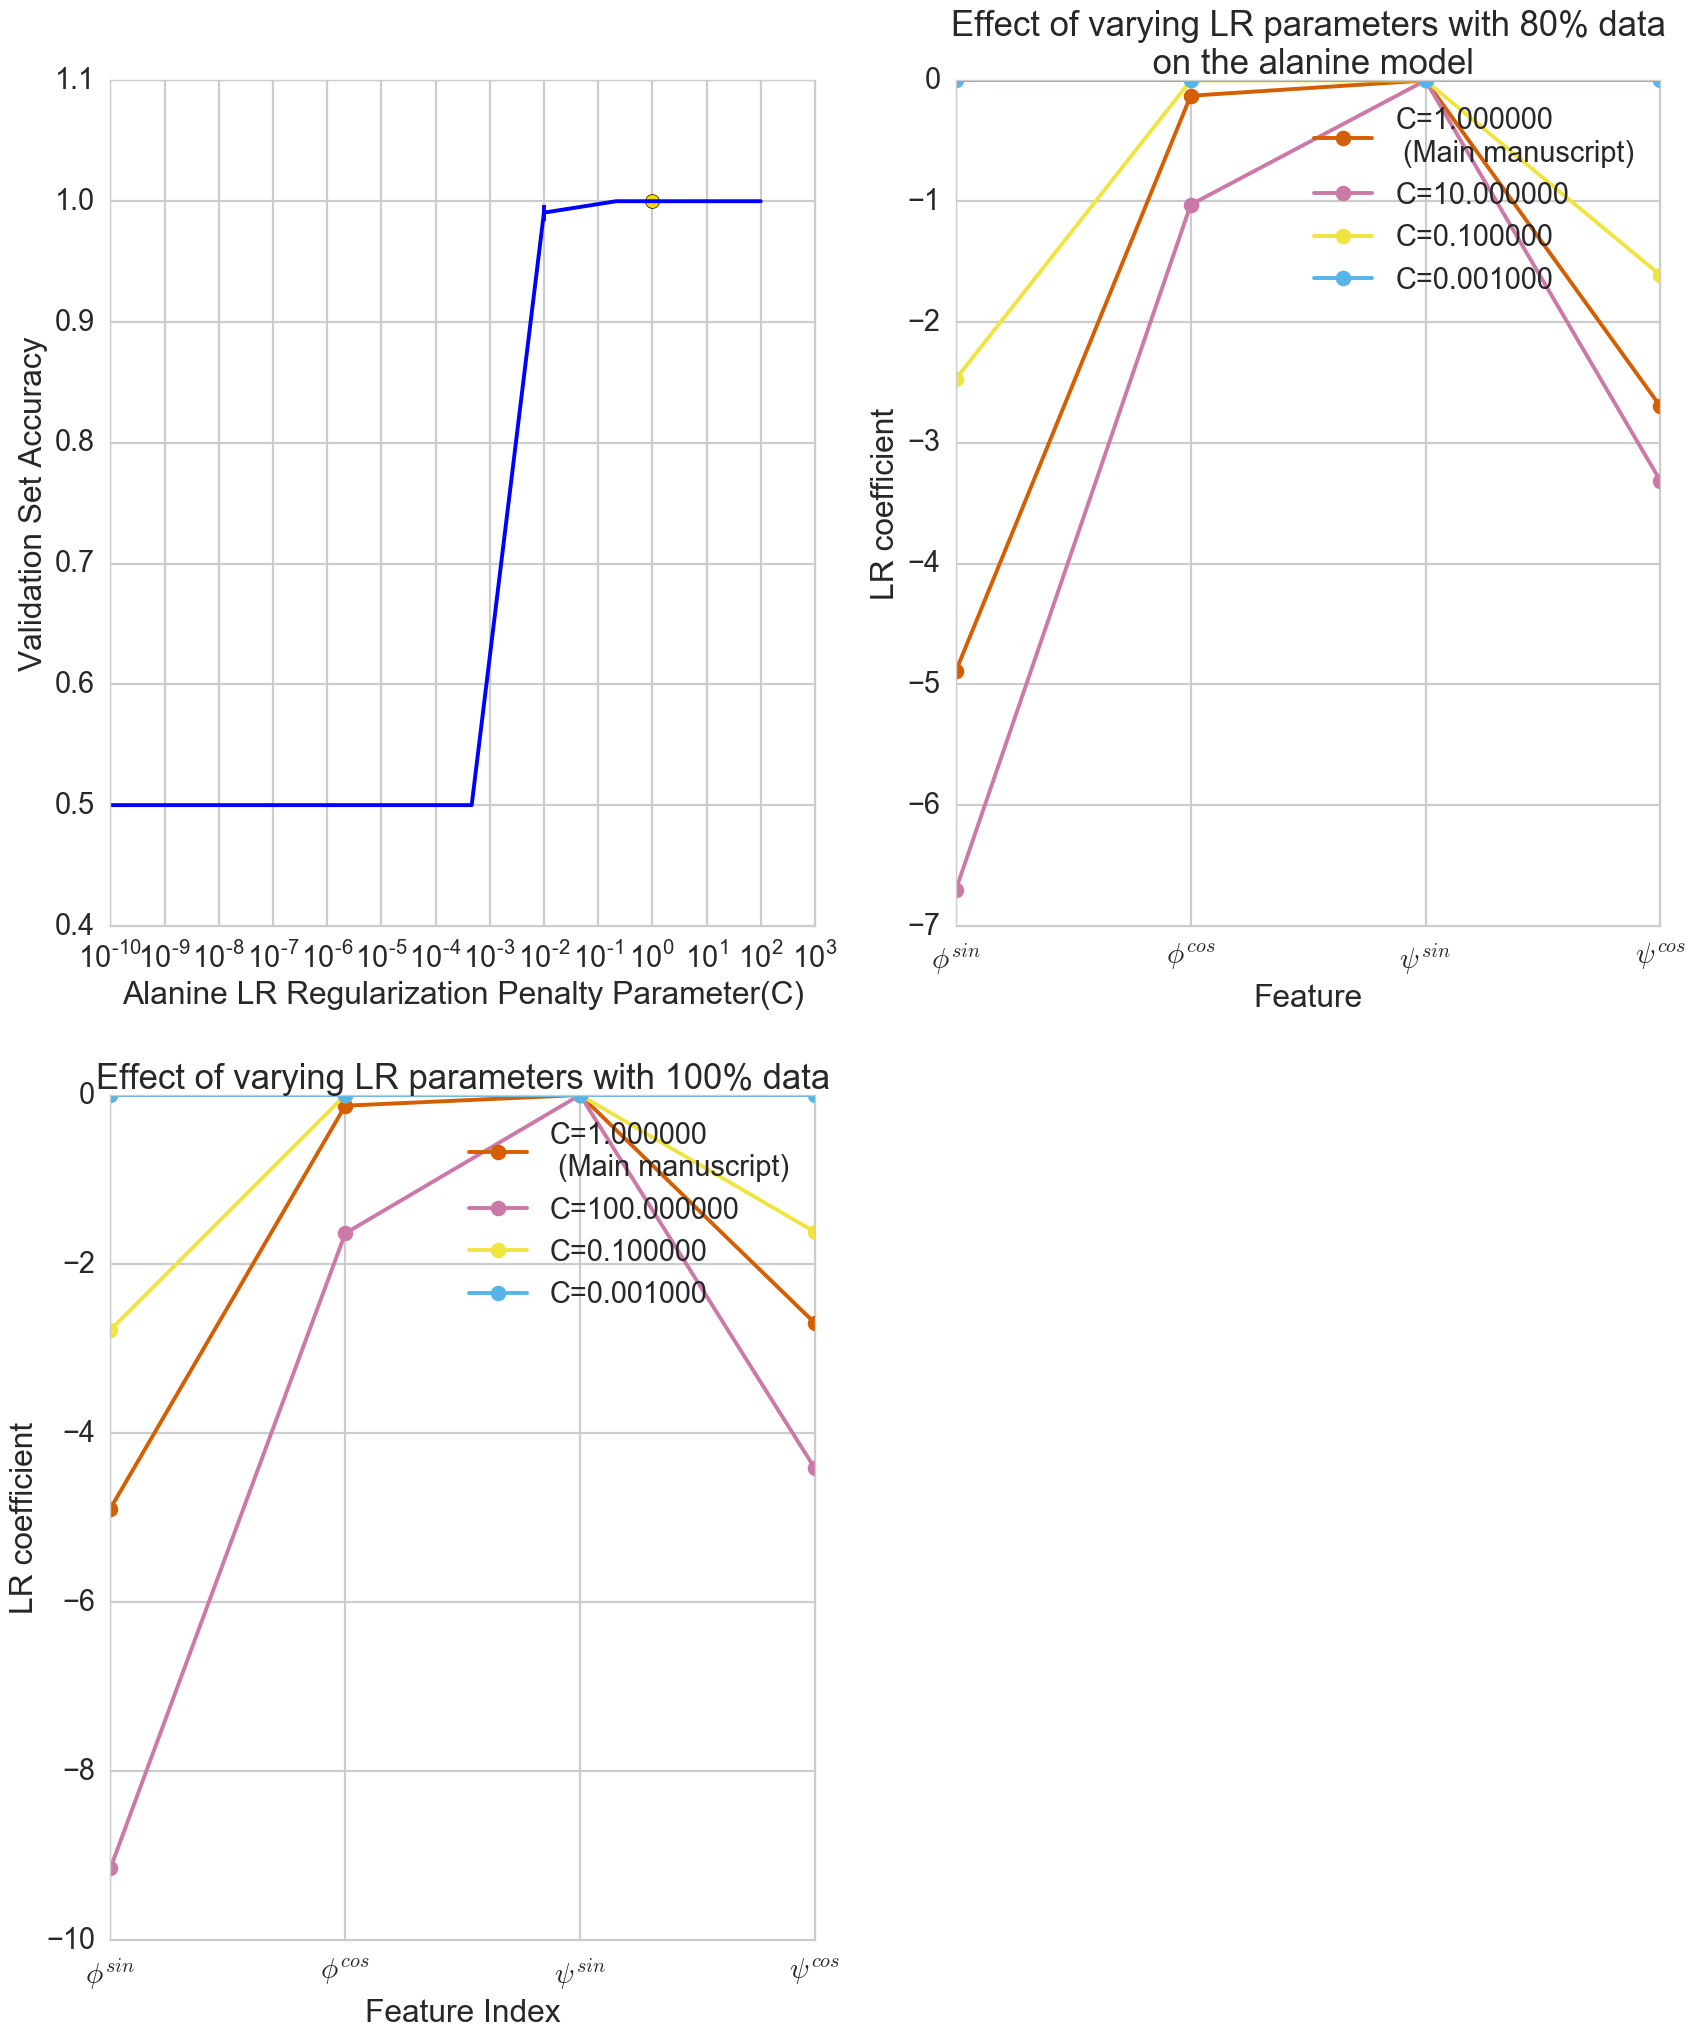

In [26]:

figure(figsize=(20,24))
subplot(2,2,1)
errorbar(C_s,scores,yerr=scores_std)
semilogx()
scatter(clf.C,gold_clf_acc,s=100,c='gold')
xlabel("Alanine LR Regularization Penalty Parameter(C)")
ylabel("Validation Set Accuracy")

subplot(2,2,2)
new_clf_1eplus = LogisticRegression(penalty="l1",C=10**1)
new_clf_1eplus.fit(X_train, y_train)


new_clf_1emin3 =  LogisticRegression(penalty="l1",C=1e-3)
new_clf_1emin3.fit(X_train, y_train)


new_clf_1emin1 = LogisticRegression(penalty="l1",C=1e-1)
new_clf_1emin1.fit(X_train, y_train)
plot(clf.coef_.T,marker='o',c=clr_plt[2],label="C=%f\n (Main manuscript)"%clf.C)
plot(new_clf_1eplus.coef_.T,marker='o',c=clr_plt[3],label="C=%f"%new_clf_1eplus.C)
plot(new_clf_1emin1.coef_.T,marker='o',c=clr_plt[4],label="C=%f"%new_clf_1emin1.C)
plot(new_clf_1emin3.coef_.T,marker='o',c=clr_plt[5],label="C=%f"%new_clf_1emin3.C)
legend()
title("Effect of varying LR parameters with 80% data\n on the alanine model")
xlabel("Feature")
ylabel(r'LR coefficient')
xticks([0,1,2,3],[r'$\phi^{sin}$',r'$\phi^{cos}$',r'$\psi^{sin}$',r'$\psi^{cos}$'])


subplot(2,2,3)
new_clf_1eplus = LogisticRegression(penalty="l1",C=100)
new_clf_1eplus.fit(full_X, full_Y)


new_clf_1emin2 = LogisticRegression(penalty="l1",C=10**-2)
new_clf_1emin2.fit(full_X, full_Y)


new_clf_1emin1 = LogisticRegression(penalty="l1",C=10**-1)
new_clf_1emin1.fit(full_X, full_Y)
clr_plt = sns.color_palette("colorblind")
plot(clf.coef_.T,marker='o',c=clr_plt[2],label="C=%f\n (Main manuscript)"%clf.C)
plot(new_clf_1eplus.coef_.T,marker='o',c=clr_plt[3],label="C=%f"%new_clf_1eplus.C)
plot(new_clf_1emin1.coef_.T,marker='o',c=clr_plt[4],label="C=%f"%new_clf_1emin1.C)
plot(new_clf_1emin3.coef_.T,marker='o',c=clr_plt[5],label="C=%f"%new_clf_1emin3.C)
legend()
title("Effect of varying LR parameters with 100% data")
xlabel("Feature Index")
ylabel(r'LR coefficient')
xticks([0,1,2,3],[r'$\phi^{sin}$',r'$\phi^{cos}$',r'$\psi^{sin}$',r'$\psi^{cos}$'])
